# Demographics and voting factors of the 2020 US Presidential Election results: A County-Level Analysis




## Introduction
Every four years, the world watches the United States as it undergoes its presidential election. For citizens, political siding has always been a significant factor in where people live. One research tracked voter files and migration data and found that “the percentage migrating to a different county but within the state varies from 1% to 30%” (Tam Cho, Gimpel, & Hui, 2012). This shows that there are tends between the type of people within a country and their party support. Another study used a research method that explored the county level and concluded that there is intense geographical polarization across different counties (Kinsella, McTague, & Raleigh, 2015). Research proves that county demographics and geography impact political influence. Another paper has found that the COVID-19 cases negatively impacted Trump's vote shares in 2020 compared to his 2016 results (Baccini, Brodeur, & Weymouth, 2021).

Further exploring the county level, other papers have also researched the US's participation rate and voter turnout. They have found that higher-income groups tend to have higher voter turnout than lower-income groups (Laurison, Brown, & Rastogi, 2021). Research closely related to the demographics and voting factors on election results in the 2020 election found that “most counties that Trump won tended to be populated with people who are more white and less educated” compared to the counties won by Biden (Smith, 2021). Most research regarding the 2020 election results focused on the demographic and socioeconomic factors within a county his project will also look into the voting results from other branches of the government.

The research question will look at what demographic and voting factors within a county best explain the US 2020 presidential election results.
<br>

## Dataset Cleaning and Loading

The “US Election 2020” and “US Election Dataset” data were used for combining (Fontes, 2021) (essarabi, 2020).

For this project, the Independent variables, X variables, are median income, population, degree attainment, urban density, racial demographics (White vs. People of Color), governor party winner, house party winner, and senate party winner, all at the county level. The dependent variable, Y variables, will focus on the county results for the presidential election.

Median Income highlights the overall economic state of the county’s residents. The county’s financial state is a key factor in how residents potentially vote in cases to support specific policies or acts from one of the parties that directly benefit them.

A county's population tells us about voter turnout and suburban or urban areas. Counties with drastically different populations could have different voting factors and patterns that can be explored across other counties in and at the state level.

Degree attainment indicates the percentage of residents who graduated with an associate degree or higher. Other research on this variable suggests that education influences political preference.

Urban density tells us how populated a specific county is. This could impact how counties vote, as some parties may support more urban areas than less urbanized ones. Density could also indicate major cities within specific counties, which could link to other variables listed.

Racial demographics show whether the county is dominated by white people or people of color. Race has always indicated potential political alignment due to specific policies that could benefit it. This helps us see if a racial demographic has strong voting trends in all counties.

The winners of the governor, house, and senate races within each county may each show trends within the party and presidential party winners of that county. This can show party alignment within a county and how the winning party of these sectors could correlate with the presidential results.
<br>

In [35]:
import pandas as pd
import numpy as np
import qeds
import matplotlib.pyplot as plt

# load president_county_candidate.csv
president_county_cand = pd.read_csv('..\\Data\\president_county_candidate.csv')
#president_county_cand.head()

# load senate_county_candidate.csv
senate_county_cand = pd.read_csv('..\\Data\\senate_county_candidate.csv')
senate_county_cand.head()

# load governors_county_candidate.csv
governor_county_cand = pd.read_csv('..\\Data\\governors_county_candidate.csv')
governor_county_cand.head()

# load house_county_candidate.csv
house_cand = pd.read_csv('..\\Data\\house_candidate.csv')
house_cand.head()

# load US_Election_dataset_v1.csv
us_election = pd.read_csv("..\\Data\\US_Election_dataset_v1.csv")
#us_election.head()

# data cleaning: president_county_cand
# col 'state'
president_county_cand['state'] = president_county_cand['state'].str.upper()
president_county_cand['state'] = president_county_cand['state'].str.strip()
president_county_cand['state'] = president_county_cand['state'].str.replace(" ", "")
# col 'county'
president_county_cand['county'] = president_county_cand['county'].str.upper()
president_county_cand['county'] = president_county_cand['county'].str.strip()
president_county_cand['county'] = president_county_cand['county'].str.replace(" COUNTY", "")
# president_county_cand_won: filter in won is True
president_county_cand_won = president_county_cand.loc[president_county_cand['won'] == True].copy()
president_county_cand_won

# data cleaning: governor_county_cand
# col 'state'
governor_county_cand['state'] = governor_county_cand['state'].str.upper()
governor_county_cand['state'] = governor_county_cand['state'].str.strip()
# col 'County Name'
governor_county_cand['county'] = governor_county_cand['county'].str.upper()
governor_county_cand['county'] = governor_county_cand['county'].str.strip()
governor_county_cand['county'] = governor_county_cand['county'].str.replace(" COUNTY", "")
governor_county_cand['county'] = governor_county_cand['county'].str.upper()
# filter in won is True
governor_county_cand_won = governor_county_cand.loc[governor_county_cand['won'] == True].copy()

# data cleaning: house_cand
# col 'state'
house_cand['district'] = house_cand['district'].str.upper()
house_cand['district'] = house_cand['district'].str.strip()
# filter in won is True
house_cand_won = house_cand.loc[house_cand['won'] == True].copy()
#print(house_cand_won)

# data cleaning: senate_county_cand
# col 'state'
senate_county_cand['state'] = senate_county_cand['state'].str.upper()
senate_county_cand['state'] = senate_county_cand['state'].str.strip()
# col 'County Name'
senate_county_cand['county'] = senate_county_cand['county'].str.upper()
senate_county_cand['county'] = senate_county_cand['county'].str.strip()
senate_county_cand['county'] = senate_county_cand['county'].str.replace(" COUNTY", "")
senate_county_cand['county'] = senate_county_cand['county'].str.upper()
# filter in records with max total_votes (won)
senate_county_cand_won = senate_county_cand.copy()
idx = senate_county_cand_won.groupby(['state', 'county'])['total_votes'].idxmax()
senate_county_cand_won = senate_county_cand_won.loc[idx]
#print(senate_county_cand_won)

# data cleaning: us_election
us_election = us_election.rename({'State': 'state', 'County Name': 'county'}, axis=1)
# col 'state'
us_election['state'] = us_election['state'].str.upper()
us_election['state'] = us_election['state'].str.strip()
# col 'County Name'
us_election['county'] = us_election['county'].str.upper()
us_election['county'] = us_election['county'].str.strip()
us_election['county'] = us_election['county'].str.replace(" COUNTY", "")
us_election['county'] = us_election['county'].str.upper()

#us_election


In [36]:
# president_county_cand: prepare columns
party_dict = {'DEM': 'Democrat', 'REP': 'Republican'}
party_map = {'DEM': 0.0, 'REP': 1.0}
president_county_cand['Party_Index'] = president_county_cand['party'].map(party_map)
president_county_cand['party'] = president_county_cand['party'].map(lambda x: party_dict.get(x, 'Third-Party'))

# president_county_cand_won: prepare columns
president_county_cand_won['Party_Index'] = president_county_cand_won['party'].map(party_map)
president_county_cand_won['party'] = president_county_cand_won['party'].map(lambda x: party_dict.get(x, 'Third-Party'))
#print(president_county_cand_won.head())

# senate_county_cand_won: prepare columns
senate_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in senate_county_cand_won['party']]
senate_county_cand_won['party'] = senate_county_cand_won['party'].map(lambda x: party_dict.get(x, 'Third-Party'))
#print(senate_county_cand_won.head())

# governor_county_cand_won: prepare columns
governor_county_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in governor_county_cand_won['party']]
governor_county_cand_won['party'] = governor_county_cand_won['party'].map(lambda x: party_dict.get(x, 'Third-Party'))
#print(governor_county_cand_won.head())

# house_cand_won: prepare columns
house_cand_won['Party_Index'] = [0.0 if x == 'DEM' else 1.0 for x in house_cand_won['party']]
house_cand_won['party'] = house_cand_won['party'].map(lambda x: party_dict.get(x, 'Third-Party'))
#print(house_cand_won.head())

# us_election: prepare new columns
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.strip()
us_election['Median income (dollars)'] = us_election['Median income (dollars)'].str.replace(',', '')
us_election['Median_Income'] = us_election['Median income (dollars)'].astype('float')
us_election['Median_Income'] = us_election['Median_Income'].div(1000.0)
us_election['Won_Vote'] = us_election[["2020 Democrat vote raw","2020 Republican vote raw","2020 other vote raw"]].max(axis=1)
us_election['Total_Vote'] = us_election["2020 Democrat vote raw"] + us_election["2020 Republican vote raw"] + us_election["2020 other vote raw"]
us_election['Vote_Percentage'] = (us_election["Won_Vote"] / us_election["Total_Vote"]) * 100
us_election['Degree_Or_Higher_Percentage'] = us_election["Associates Degree"].str.rstrip('%').astype('float') + us_election["Bachelors Degree"].str.rstrip('%').astype('float') + us_election["Graduate or professional degree"].str.rstrip('%').astype('float')
#us_election.head()

# merge datasets
final_df = pd.merge(president_county_cand_won, us_election, on=['state', 'county'], how="inner")
#print(final_df.count())





## Summary Statistics Tables

The summary statistics of this project could be split into two categories: continuous and categorical variables.

|                       |  Mean     | Median   |  Mode      |  Range               |  Min     |   Max     |  Count  | Standard Deviation  |
| --------------------- | ------    | -------- | --------   | -------------------- | -----    | --------- | ------- | ------------------- |
| **Income**            | 63305.60  | 60931.00 | 61250.00   | 17900.00 - 170463.00 | 17900.00 | 170463.00 | 3142    | 16819.01            |
| **Population**        | 105456.34 | 25698    | (see note) | 64 - 10014009        | 64       | 10014009  | 3143    | 335760.39           |
| **Degree Attainment** | 33.11%    | 31.60%   | 34.50%     | 7.50% - 81.00%       | 81.00%   | 7.50%     | 3143    | 10.40%              |
| **Urban Density**     | 106.44    | 17.27    | 13.28      | 0.01 - 28048.18      | 0.01     | 28048.18  | 3143    | 704.09              |

The income shows the overall median income for every county in the US. We can see a larger difference in income, especially when looking at the range. The table is skewed to the right, meaning more counties have lower median incomes.

The population of each county gives us an overall idea of how big each county would be by looking at the mean.\
Note: For mode calculation, there are 57 values with repeated count equal to 2, so it is not a good indicator to measure central tendency.

The degree attainment rate gives us an idea of the percentage of the county that has received some degree. The mean degree attainment for the counties is about 33%. This dats is also skewed right, and the mode percentage is roughly similar to the mean, meaning that most counties have a degree attainment rate of approximately 33%.

The urban density for the counties shows some significant outliers, especially in major cities in specific counties, which causes the range to be huge. Also, the county's urban density is related to its population.

|               |  Mean    | Median   |  Mode   |  Range               |  Min     |   Max     |  Count  | Standard Deviation  |
| ------------- | ------   | ------   | ------  | -------------------- | -----    | ------    | ------- | ------------------- |
| **Governor**  | 0.921951 | 1.0      | 1.0     | 0.0 - 1.0            | 0.0      | 1.0       | 1025    | 0.268379            |
| **House**     | 0.488532 | 0.0      | 0.0     | 0.0 - 1.0            | 0.0      | 1.0       | 436     | 0.500443            |
| **Senate**    | 0.309378 | 0.0      | 0.0     | 0.0 - 1.0            | 0.0      | 1.0       | 3423    | 0.462305            |

A dummy variable was assigned for the categorical data in the second table. For the political value (0=democrat, 1=republican), the governor's votes heavily supported the Republican party. At the same time, the House had more of an even distribution between the two parties, while the Senate had more counties supporting the Democrats.
<br>

In [ ]:
# Get statistics

print("\n====================")
print("Governor:")
print("====================")
print(governor_county_cand_won['Party_Index'].describe())
print("\n====================")
print("Governor - MEDIAN:")
print("====================")
print(governor_county_cand_won['Party_Index'].median())
print("\n====================")
print("Governor - MODE:")
print("====================")
print(governor_county_cand_won['Party_Index'].mode())

print("\n====================")
print("House:")
print("====================")
print(house_cand_won['Party_Index'].describe())
print("\n====================")
print("House - MEDIAN:")
print("====================")
print(house_cand_won['Party_Index'].median())
print("\n====================")
print("House - MODE:")
print("====================")
print(house_cand_won['Party_Index'].mode())

print("\n====================")
print("Senate:")
print("====================")
print(senate_county_cand_won['Party_Index'].describe())
print("\n====================")
print("Senate - MEDIAN:")
print("====================")
print(senate_county_cand_won['Party_Index'].median())
print("\n====================")
print("Senate - MODE:")
print("====================")
print(senate_county_cand_won['Party_Index'].mode())

# generate statistics
print("\n====================")
print("4 Variables:")
print("====================")
columns = ["Median_Income", "Degree_Or_Higher_Percentage", "Total Population", "Density per square km"]
print(us_election[columns].describe().transpose())
print("\n====================")
print("4 Variables - MEDIAN:")
print("====================")
print(us_election[columns].median())
print("\n====================")
print("4 Variables - MODE:")
print("====================")
print(us_election[columns].mode())




## Plots, Histograms, Figures



### Graph-1: Number of counties won President vs Party


[Text(0, 0, '514'), Text(0, 0, '2575')]

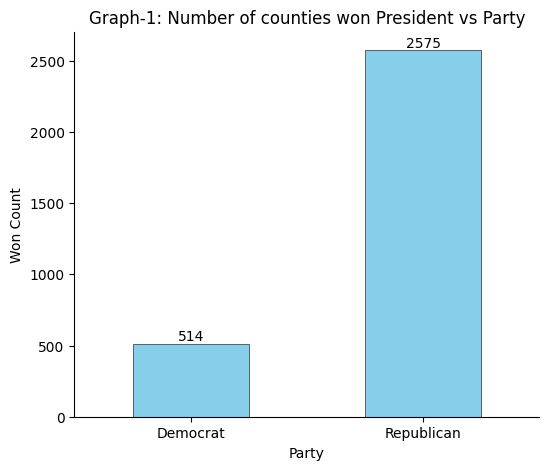

In [47]:
# Graph-1: Number of counties won President vs Party

# calculate value counts
counts = final_df['party'].value_counts()

fig, ax = plt.subplots(figsize=(6, 5))
counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black', linewidth=0.4)

# plot barchart
plt.xticks(rotation=0)
ax.set_xlabel('Party')
ax.set_ylabel('Won Count')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("Graph-1: Number of counties won President vs Party")
ax.bar_label(ax.containers[0])



This graph shows the counties that voted for each party except for that voted for a third-party candidate. This ties directly to our Y variable as we examine factors that could explain this. Although Republicans have a huge advantage in county wins compared to Democrats, this still results in them winning the presidential race. There might be underlying factors that explain the big difference in county wins.
<br>

### Graph-2: Percentage of votes won within the county vs Median Income


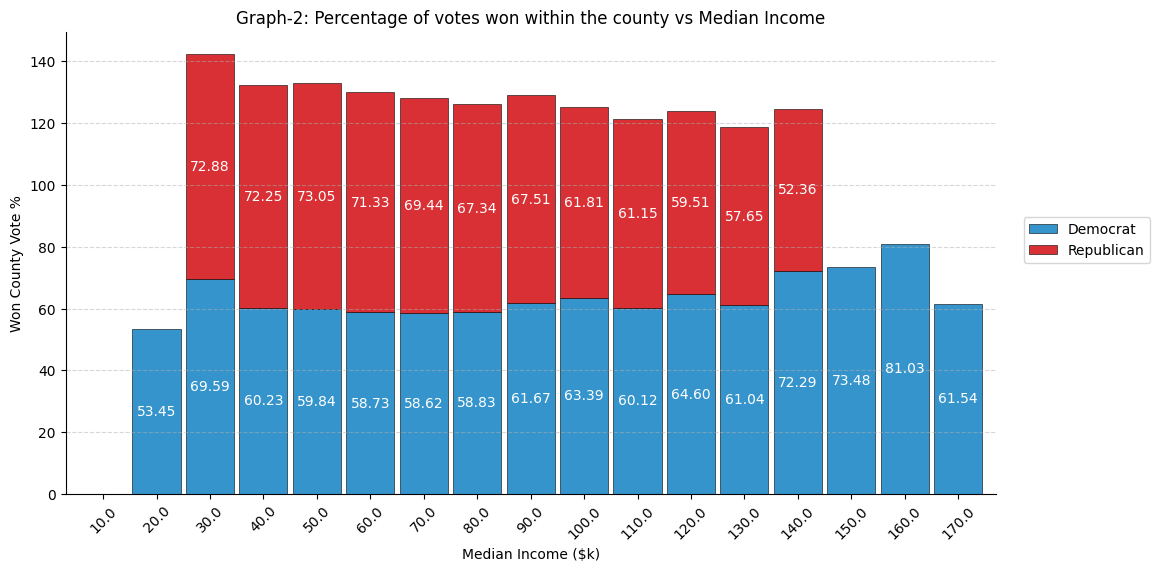

In [39]:
# Graph-2: Percentage of votes won within the county vs Median Income
# select columns to be ploted
data_df = final_df[['Median_Income', 'Vote_Percentage', 'party']]

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  

# group Education attainment in range
income_bins = np.arange(5.0, 180.0, 10.)
pivot1_df = data_df.copy()
pivot1_df['IncomeGroup'] = pd.cut(data_df["Median_Income"], bins=income_bins)
pivot1_df['IncomeGroupMid'] = pivot1_df['IncomeGroup'].apply(lambda x: x.mid)
pivot2_df = pivot1_df.groupby(['party', 'IncomeGroupMid'], observed=False).agg(Vote_Percentage_Mean=('Vote_Percentage', 'mean')).reset_index().copy()

# Pivot the DataFrame
pivot3_df = pivot2_df.pivot(index='IncomeGroupMid', columns='party', values='Vote_Percentage_Mean')

# Plotting with custom colors
ax = pivot3_df.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.9, color=colors, edgecolor='black', linewidth=0.4)

# Adding values on the bars
for i, party in enumerate(pivot3_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot3_df.columns):
        value = pivot3_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Adding labels and title
plt.xlabel('Median Income ($k)')
plt.ylabel('Won County Vote %')
plt.title('Graph-2: Percentage of votes won within the county vs Median Income')
plt.legend(loc=(1.03, 0.5))
plt.xticks(rotation = 45)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()


This graph displays the median income and the winning vote percentage within the winning party for the county. It shows how much each county wins at different income levels. We can see that higher-income groups tended to have higher vote percentages for the Democrats, while Republicans tended to be supported by lower-income counties. The two lowest and highest ranges of counties were all won by the Democrats.
<br>

### Graph-3: Percentage of votes for the won party in the county vs Degree attainment (Assoc. Degree/ Bachelor, or higher)


Text(0.5, 1.0, 'Democrat')

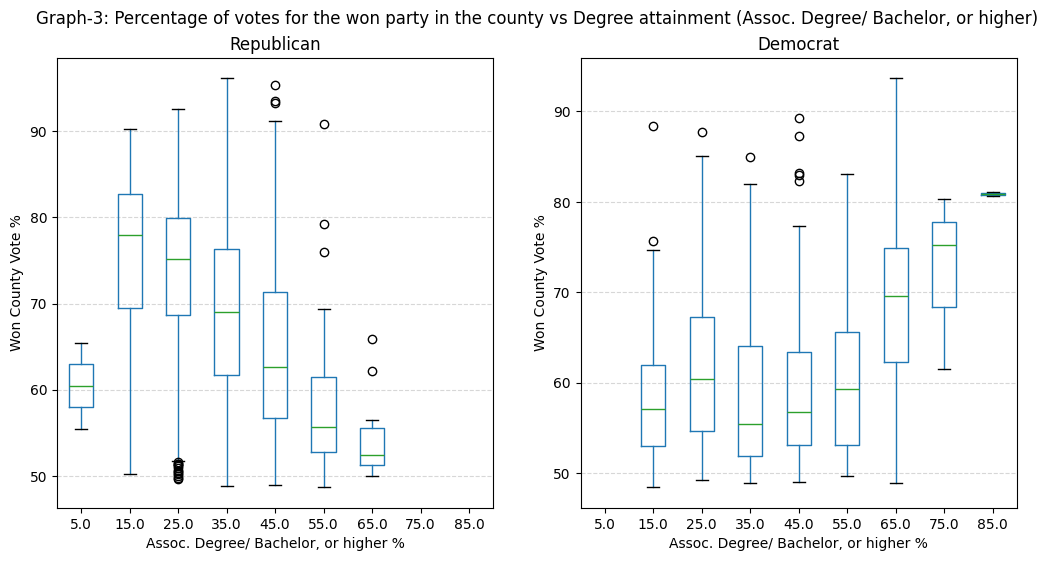

In [40]:
# Graph-3: Graph-3: Percentage of votes for the won party in the county vs Degree attainment (Assoc. Degree/ Bachelor, or higher)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# select columns to be ploted
data_df = final_df[["Degree_Or_Higher_Percentage", "Vote_Percentage", "party"]]

# group Education attainment in range
education_bins = np.arange(0, 100, 10)
g2_df = data_df.copy()
g2_df['EducationGroup'] = pd.cut(data_df["Degree_Or_Higher_Percentage"], bins=education_bins)
g2_df['EducationGroupMid'] = g2_df['EducationGroup'].apply(lambda x: x.mid)
rep_df = g2_df[g2_df['party']=='Republican'].copy()
rep_df.boxplot(by='EducationGroupMid', column =['Vote_Percentage'], ax=ax[0], grid = False) 
dem_df = g2_df[g2_df['party']=='Democrat'].copy()
dem_df.boxplot(by='EducationGroupMid', column =['Vote_Percentage'], ax=ax[1], grid = False) 

fig.suptitle("Graph-3: Percentage of votes for the won party in the county vs Degree attainment (Assoc. Degree/ Bachelor, or higher)")
ax[0].grid(axis='y', linestyle='--', alpha=0.5)
ax[0].set_xlabel("Assoc. Degree/ Bachelor, or higher %")
ax[0].set_ylabel('Won County Vote %')
ax[0].set_title("Republican")
ax[1].grid(axis='y', linestyle='--', alpha=0.5)
ax[1].set_xlabel("Assoc. Degree/ Bachelor, or higher %")
ax[1].set_ylabel('Won County Vote %')
ax[1].set_title("Democrat")


This graph looks at the education attainment within the county with the percentage of votes won for the winning part in the county. We can compare how winning counties for Republicans and Democrats with their degree attainment rate. We can see that counties that vote Democrat have higher degree rates with it being skewed left compared to the Republicans being more skewed right. The average mean winning percentage for Republicans also gradually decreased after 15% compared to Democrats, which stayed even at around the 55% range and increased as the degree attainment increased.
<br>


### Graph-4: Percentage of votes won within county vs Population of county


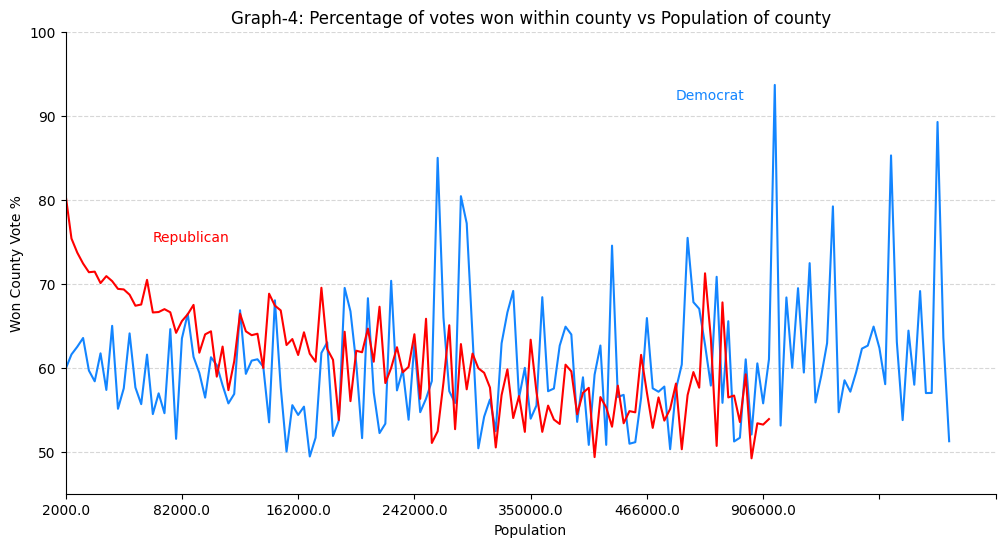

In [41]:
# Graph-4: Percentage of votes won within county vs Population of county

fig, ax = plt.subplots(figsize=(12, 6))

# select columns to be ploted
data_df = final_df[["Total Population", "Vote_Percentage", "party"]]

# group population in range
population_bins = np.arange(0, 1000000, 4000)
#x_ticks = np.arange(0, 1000000, 10000)

g4_df = data_df.copy()
g4_df['TotalPopulationGroup'] = pd.cut(data_df["Total Population"], bins=population_bins)

# create Average of Vote Percentage
g4_df = g4_df.groupby(['TotalPopulationGroup', 'party'], observed=False).agg(
                Averge_Vote_Percentage=('Vote_Percentage', 'mean')
                ).reset_index()
g4_df['TotalPopulationGroupMid'] = g4_df['TotalPopulationGroup'].apply(lambda x: x.mid)
g4_df.set_index('TotalPopulationGroupMid', inplace=True)

# plot chart
colors = {'Democrat': '#1385ff', 'Republican': 'red', 'Third-Party': 'purple'}

dem_df = g4_df[g4_df['party']=='Democrat'].copy()
dem_df.dropna(subset=["Averge_Vote_Percentage"], inplace=True)
dem_df.plot(y='Averge_Vote_Percentage', ax=ax, legend=False, color=colors["Democrat"])

rep_df = g4_df[g4_df['party']=='Republican'].copy()
rep_df.dropna(subset=["Averge_Vote_Percentage"], inplace=True)
rep_df.plot(y='Averge_Vote_Percentage', ax=ax, legend=False, color=colors["Republican"])

ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xlabel("Population")
ax.set_ylabel('Won County Vote %')
ax.set_title("Graph-4: Percentage of votes won within county vs Population of county")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(45, 100)
ax.set_xlim((0, 160))

ax.annotate("Democrat", (105, 92), color=colors["Democrat"])
ax.annotate("Republican", (15, 75), color=colors["Republican"]);


This shows the population and the county vote win percentage for each party represented by the different lines. We can see how the population affects their voting party support. Republican-supported counties tend to have lower population numbers within their counties, and we can see a decrease in winning vote percentage as the population increases. While for democrats, counties have somewhat of a constant winning vote percentage but more volatilities throughout.
<br>


### Graph-5: Number of votes for each party president vs State

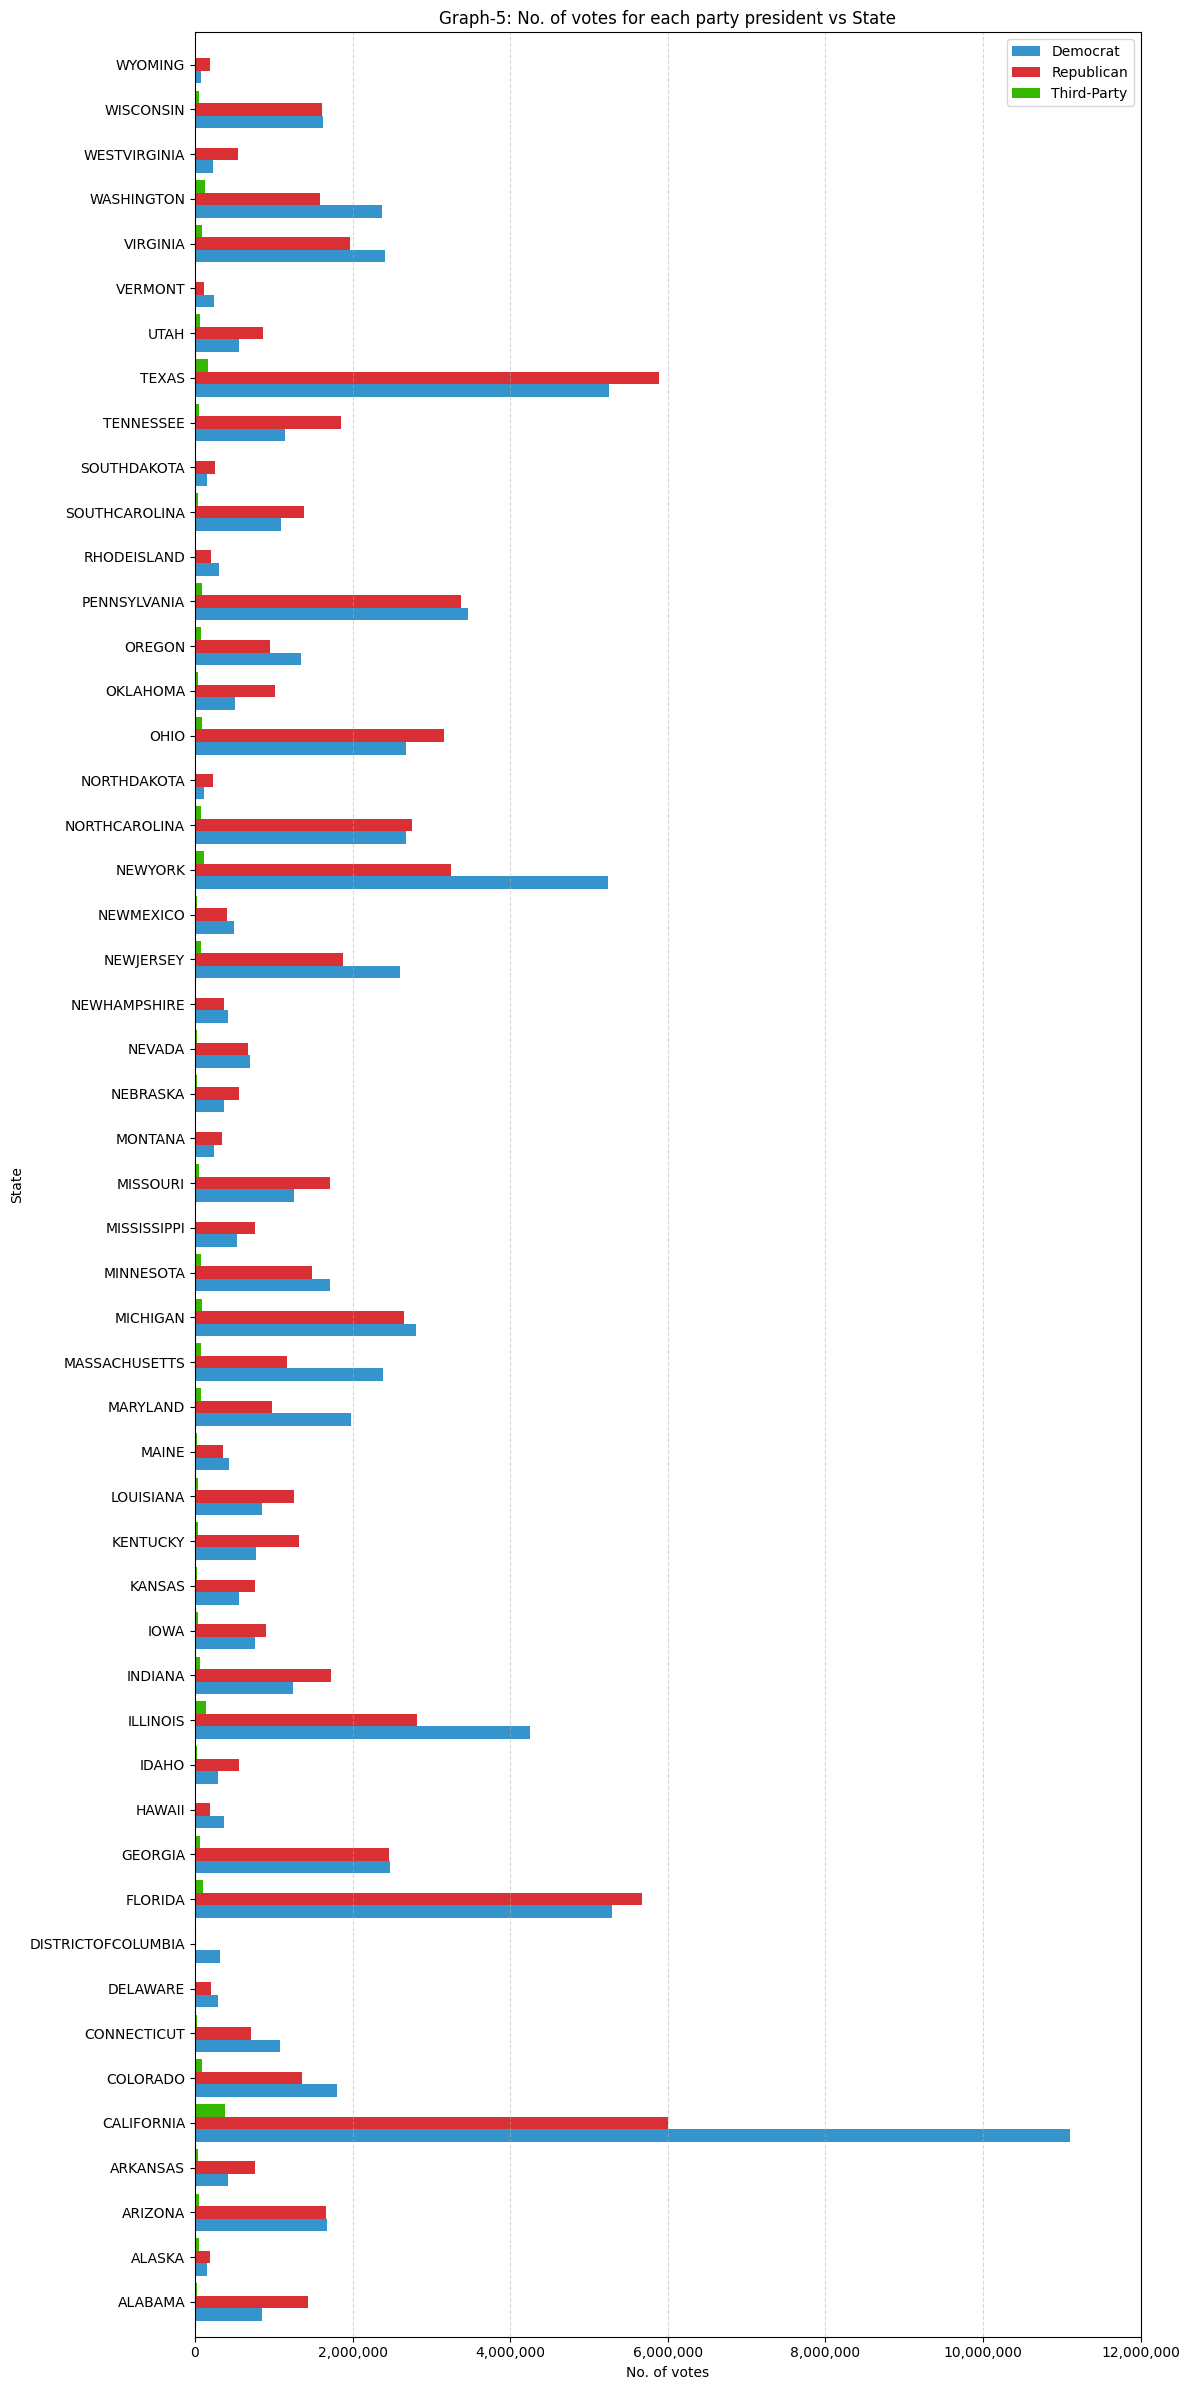

In [42]:
# Graph-5: Number of votes for each party president vs State
from matplotlib.ticker import FuncFormatter

# select columns to be ploted
data_df = president_county_cand.groupby(['state','party']).agg({'total_votes': 'sum'})
data_df = data_df.reset_index()
#data_df

# Reshape the DataFrame using pivot_table
pivot_df = data_df.pivot_table(index='state', columns='party', values='total_votes', aggfunc='sum').reset_index()

# Fill missing values with 0 (if any)
pivot_df = pivot_df.fillna(0)

# plot graph
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 24))

# Define custom colors for each type
colors = {
    'Democrat': '#3594cc',  # Blue
    'Republican': '#d83034',  # Red
    'Third-Party': '#36b700'  # Green
}

# Number of states
n_states = len(pivot_df['state'])

# Height of the bars
bar_height = 0.28

# Positions for the bars
index = np.arange(n_states)

# Plotting each party
for i, party in enumerate(['Democrat', 'Republican', 'Third-Party']):
    ax.barh(index + i * bar_height, pivot_df[party], bar_height, label=party, color=colors[party])

# Adding labels and title
ax.set_xlabel('No. of votes')
ax.set_ylabel('State')
ax.set_title('Graph-5: No. of votes for each party president vs State')
ax.set_yticks(index + bar_height)
ax.set_yticklabels(pivot_df['state'])
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Format x-axis ticks as integers
def format_votes(x, pos):
    return f'{int(x):,}'  # Format as integer with commas as thousand separators

# format x-axis label
ax.xaxis.set_major_formatter(FuncFormatter(format_votes))

# Adjust y-axis limits to remove extra white space
ax.set_xlim(0, 12000000)
ax.set_ylim(-0.5, n_states)  # Adjust the limits to fit the bars tightly

# Move the legend to the top
#ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3, fontsize='medium')

# Show the plot
plt.tight_layout()
plt.show()

This graph shows the number of votes by party for each state, the number of voters in each county, and how each state voted compared to other states on a larger scale. Smaller voting states tend to have more votes for Republicans, while larger voting states have more for Democrats. This aligns with our population graph, as our population also saw similar trends in party support.
<br>


### Graph-6: Vote share for the different parties' president vs Urban density


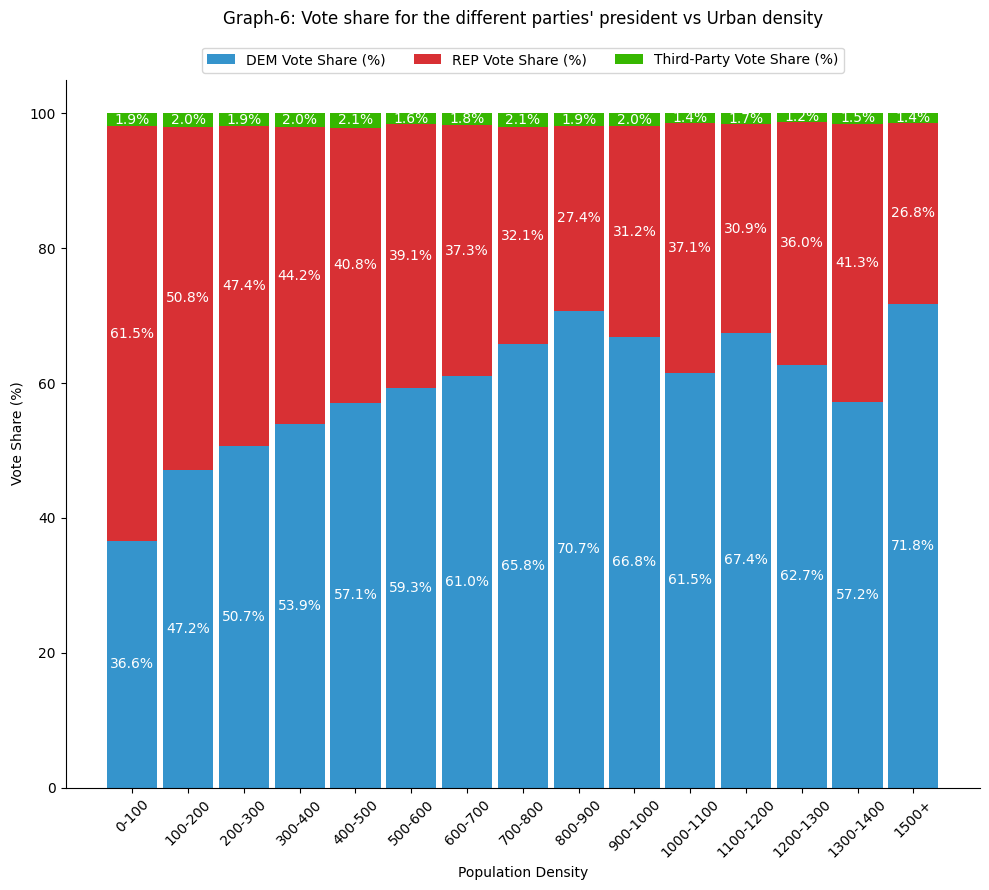

In [43]:
# Graph-6: Vote share for the different parties' president vs Urban density

# select columns to be ploted
data_df = us_election.copy()

# Define custom bins for population density: 0-1500 in steps of 100, and 1500+
density_bins = list(range(0, 1500, 100)) + [np.inf]  
# Assign each county to a population density bin
data_df['Density_Bin'] = pd.cut(data_df['Density per square km'], bins=density_bins, right=False)

# Group by the density bin and calculate the total votes for each party in each bin
grouped_df = data_df.groupby('Density_Bin', observed=False)[['2020 Democrat vote raw', '2020 Republican vote raw', '2020 other vote raw', 'Total_Vote']].sum()

# Calculate the vote share percentage for each party in each bin
grouped_df['DEM_Share'] = grouped_df['2020 Democrat vote raw'] / grouped_df['Total_Vote'] * 100
grouped_df['REP_Share'] = grouped_df['2020 Republican vote raw'] / grouped_df['Total_Vote'] * 100
grouped_df['THIRDPARTY_Share'] = grouped_df['2020 other vote raw'] / grouped_df['Total_Vote'] * 100


# Plot the stacked histogram
fig, ax = plt.subplots(figsize=(10, 9))

# Define custom colors for each type
colors = {
    'Democrat': '#3594cc',  # Blue
    'Republican': '#d83034',  # Red
    'Third-Party': '#36b700'  # Green
}

# Define the x-axis labels (bin intervals)
x_labels = [f'{int(b.left)}-{int(b.right)}' if not np.isinf(b.right) else '1500+' for b in grouped_df.index]

# Convert the vote share columns to NumPy arrays
dem_share = grouped_df['DEM_Share'].values
rep_share = grouped_df['REP_Share'].values
thirdparty_share = grouped_df['THIRDPARTY_Share'].values

# Plot the stacked bars
bar_width = 0.9
dem_bars = ax.bar(x_labels, dem_share, label='DEM Vote Share (%)', color=colors['Democrat'], width=bar_width)
rep_bars = ax.bar(x_labels, rep_share, bottom=dem_share, label='REP Vote Share (%)', color=colors['Republican'], width=bar_width)
thirdparty_bars = ax.bar(x_labels, thirdparty_share, bottom=dem_share + rep_share, label='Third-Party Vote Share (%)', 
                         color=colors['Third-Party'], width=bar_width)

# Add values inside the bars
def add_values(bars, bottom=None):
    for i, bar in enumerate(bars):
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_y() + height / 2 if bottom is None else bottom[i] + height / 2
        ax.text(x, y, f'{height:.1f}%', ha='center', va='center', color='white', fontsize=10)

# Add values to each stacked bar
add_values(dem_bars)
add_values(rep_bars, bottom=dem_share)
add_values(thirdparty_bars, bottom=dem_share + rep_share)

# Add labels and title
ax.set_xlabel('Population Density')
ax.set_ylabel('Vote Share (%)')
ax.set_title("Graph-6: Vote share for the different parties' president vs Urban density", pad=40)
# Move the legend to the top in one row
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3, fontsize='medium')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



This shows the population density and the counties' vote share percentage within the density range. It also shows whether there are trends in party support depending on the population density of different counties. For example, more counties vote for Republicans in lower-density areas, while the opposite is true for Democrats.
<br>


### Graph-7: Proportion of counties won by each party vs Eelection Type

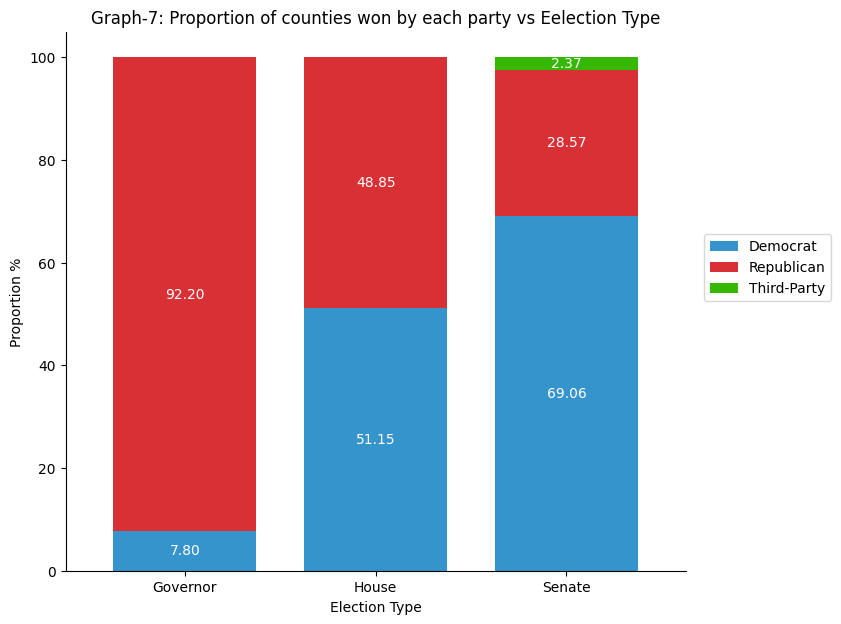

In [44]:
# Graph-7: Proportion of counties won by each party vs Eelection Type

# Prepare data
house_df = house_cand_won.groupby('party').agg(Proportion=('party', 'count')).reset_index().copy()
house_total_count = house_cand_won['party'].count()
house_df['Proportion'] = (house_df['Proportion'] / house_total_count) * 100.0

senate_df = senate_county_cand_won.groupby('party').agg(Proportion=('party', 'count')).reset_index().copy()
senate_total_count = senate_county_cand_won['party'].count()
senate_df['Proportion'] = (senate_df['Proportion'] / senate_total_count) * 100.0

governor_df = governor_county_cand_won.groupby('party').agg(Proportion=('party', 'count')).reset_index().copy()
governor_total_count = governor_county_cand_won['party'].count()
governor_df['Proportion'] = (governor_df['Proportion'] / governor_total_count) * 100.0

# Combine the DataFrames
house_df['Election Type'] = 'House'
senate_df['Election Type'] = 'Senate'
governor_df['Election Type'] = 'Governor'
combined_df = pd.concat([house_df, senate_df, governor_df])

# Pivot the DataFrame
#pivot_df = combined_df.pivot(index='party', columns='Election Type', values='Proportion')
pivot_df = combined_df.pivot(index='Election Type', columns='party', values='Proportion')

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  
#colors = {
#    'Democrat': '#3594cc',  # Blue
#    'Republican': '#d83034',  # Red
#    'Third-Party': '#36b700'  # Green
#}

# Plotting with custom colors
bar_width = 0.75
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(8, 7), width=bar_width, color=colors)

# Adding values on the bars
for i, party in enumerate(pivot_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot_df.columns):
        value = pivot_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Adding labels and title
plt.xlabel('Election Type')
plt.ylabel('Proportion %')
plt.title('Graph-7: Proportion of counties won by each party vs Eelection Type')
plt.legend(loc=(1.03, 0.5))
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()

This graph shows the proportion of counties won by each party and the three other election types. For the governor, most counties voted for the Republican party, while the House had a more even distribution. The Democratic party was more dominant in the Senate, with the third party winning some Senate seats. 
<br>


### Graph-8: Percentage of the won counties for each party vs Race

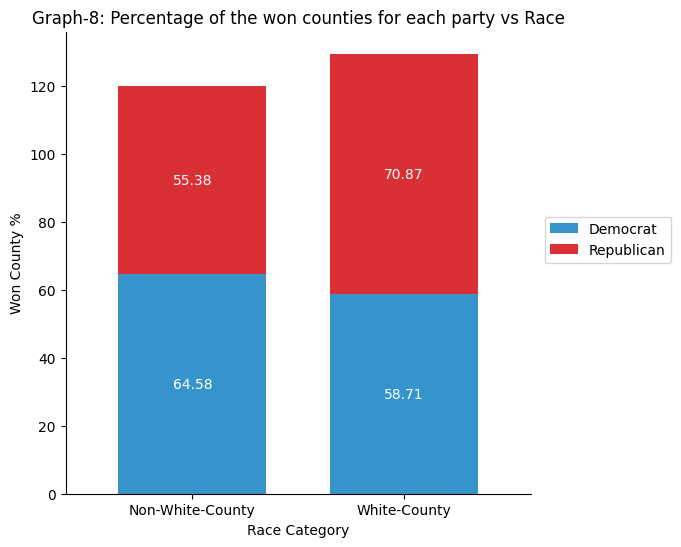

In [45]:
# Graph-8: Percentage of the won counties for each party vs Race

# select columns to be ploted
data_df = final_df.copy()
# Calculate NH-Rest percentage
data_df['NH-Rest'] = (
    data_df['NH-Black percentage'] + 
    data_df['NH-American Indian and Alaska Native percentage'] + 
    data_df['NH-Asian percentage'] + 
    data_df['NH-Native Hawaiian and Other Pacific Islander percentage'] + 
    data_df['NH-Some Other Race percentage'] + 
    data_df['NH-Two or More Races percentage']
)

# Classify counties as White-County or Non-White-County
data_df['Race_Type'] = np.where(
    data_df['NH-White percentage'] > data_df['NH-Rest'], 
    'White-County', 
    'Non-White-County'
)

data2_df = data_df[['party', 'Vote_Percentage', 'Race_Type']]
#data2_df.head()

# create Average of Vote Percentage
data2_df = data2_df.groupby(['Race_Type', 'party'], observed=False).agg(
                Averge_Vote_Percentage=('Vote_Percentage', 'mean')
                ).reset_index()
#data2_df.head()

# Pivot the DataFrame
pivot_df = data2_df.pivot(index='Race_Type', columns='party', values='Averge_Vote_Percentage')

# Define custom colors for each type
colors = ['#3594cc', '#d83034', '#36b700']  
#colors = {
#    'Democrat': '#3594cc',  # Blue
#    'Republican': '#d83034',  # Red
#    'Third-Party': '#36b700'  # Green
#}

# Plotting with custom colors
bar_width = 0.7
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(6, 6), width=bar_width, color=colors)

# Adding values on the bars
for i, party in enumerate(pivot_df.index):
    bottom = 0  # Track the bottom of each stack
    for j, type_col in enumerate(pivot_df.columns):
        value = pivot_df.loc[party, type_col]
        if value > 0:  # Only display values greater than 0
            ax.text(
                x=i,  # x-position of the bar
                y=bottom + value / 2,  # y-position (middle of the stack segment)
                s=f'{value:.2f}',  # Display value with 2 decimal places
                ha='center',  # Horizontal alignment
                va='center',  # Vertical alignment
                color='white',  # Text color
                fontsize=10  # Font size
            )
        bottom += value  # Update the bottom for the next stack segment

# Adding labels and title
plt.xlabel('Race Category')
plt.ylabel('Won County %')
plt.title('Graph-8: Percentage of the won counties for each party vs Race')
plt.legend(loc=(1.03, 0.5))
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Show the plot
plt.show()


This graph shows the racially dominated counties and the winning party percentage for each county. In a non-white-dominated party, the Democrats have a slight edge, as most non-white counties usually win by around 64%. However, white-dominated counties have a much higher winning percentage, around 70%, for Republican party support. The Democratic winning party is also smaller in white-dominated counties. The opposite is seen for the Republican side.
<br>


## Conclusion

This project explored demographic and socioeconomic factors in the 2020 election results. Some key findings are that most winning counties for the Republicans tend to have lower degree attainment, median income, and population density and are more white-dominated. The Republicans also won more counties than the Democrats but still lost. A potential explanation for this could be that most of the counties that the Republicans won had smaller populations and also didn’t contain as many major cities as the Democrats. The population graph most accurately showed this trend as the Republicans dominated smaller populated counties while largely populated counties were dominated by the Democrats. Other factors also tended to support the conclusion drawn from the visuals, as we can see a somewhat clear trend in our conclusion.